# Project: Investigate a Dataset - [The Movie Database (TMDb)]

 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Quest">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limit">Limitations</a></li>
</ul>

## Introduction

The project goal is to investigate the datset first. The dataset is based on more than 10,000 movies which contains basic information like movie name, movie director, budget of the movie, release year of the movie and other information. I will answer the following questions after analyzing the dataset:

## Questions

1. Which year has seen more investment year to year?
2. Average Profit made by movies year to year?
3. Highest number of movies made by a single production house?
4. Which actors have casted in most movies?
5. Relationsship between Movie Runtime and revenue
6. Average movie runtime by year

In [3]:
#importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

We will load the dataset here and check for any null values or any duplicate values. We will also eliminate any columns that are irrelevant to our analysis.

In [4]:
#Importing the CSV file
df_movies= pd.read_csv('./data/tmdb_movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
# Getting to know the basic information of the dataset.
# In this section we will have a overview of the columns the data set have
# We will also check the datatypes of each columns in this dataset
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                10866 non-null  int64  
 1   revenue               10866 non-null  int64  
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   keywords              9373 non-null   object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   vote_count            10866 non-null  int64  
 9   vote_average          10866 non-null  float64
 10  release_year          10866 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 933.9+ KB


In [9]:
# Finding out the number of Rows and columns of the dataset
df_movies.shape

(10866, 21)

Here we can see that the dataset has 21 columns and 10866 rows 

In [12]:
#Checking duplicated data 
df_movies.duplicated().sum()

1

We have found ony 1 duplicate value which we are going to drop in the next section.

In [13]:
#Dropping duplicates value
df_movies.drop_duplicates(inplace=True)

In [14]:
#Checking duplicate value after droping it.
df_movies.duplicated().sum()


0

So, it can be assured that the duplicate row was succcesful merged to one single row. In the next section, we drop the Null values.

In [15]:
#Checking number of missing values in each column
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [17]:
#Dropping the NULL values
df_movies.dropna(inplace=True)

In [18]:
#Verifying that NULL values were succefully dropped
df_movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

The data we have right now is unique and without any missing values. 

Lets now drop the columns that we dont need for our analysis.

In [7]:
#Dropping the columns we dont need
drop_column=['id', 'imdb_id', 'popularity', 'original_title', 'homepage', 'tagline',
             'overview', 'release_date', 'budget_adj', 'revenue_adj']
df_movies.drop(drop_column, axis= 1, inplace= True)
df_movies.head(10)

,budget,revenue,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year
0,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015
5,135000000,532950503,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,3929,7.2,2015
6,155000000,440603537,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2598,5.8,2015
7,108000000,595380321,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,4572,7.6,2015
8,74000000,1156730962,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015
9,175000000,853708609,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015


## Exploratory Data Analysis

In [19]:
#Checking the basic statistics of the data set

df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1992.000000,1992.000000,1.992000e+03,1.992000e+03,1992.000000,1992.000000,1992.000000,1992.000000,1.992000e+03,1.992000e+03
mean,71652.152108,1.316763,3.454924e+07,1.152153e+08,106.040161,643.616968,6.178614,2007.796687,3.627376e+07,1.302391e+08
std,92355.883915,1.873563,5.061878e+07,2.202887e+08,29.234592,1092.355998,0.881955,7.549224,5.129783e+07,2.564338e+08
min,11.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,10.000000,2.100000,1961.000000,0.000000e+00,0.000000e+00
25%,9699.000000,0.384079,0.000000e+00,0.000000e+00,92.000000,51.000000,5.600000,2006.000000,0.000000e+00,0.000000e+00
50%,35112.500000,0.774223,1.500000e+07,2.578782e+07,102.000000,210.000000,6.200000,2010.000000,1.524601e+07,2.806370e+07
75%,83573.000000,1.538639,4.800000e+07,1.278787e+08,116.000000,688.250000,6.800000,2012.000000,5.064450e+07,1.393645e+08
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


## Q.1 Total movie budget in different years 

In [5]:
#Total movie budget in different years
movie_budget= df_movies.groupby('release_year')['budget'].sum()
movie_budget.tail(20)

release_year
1996    3687042051
1997    4751086675
1998    4499660000
1999    5765235106
2000    5752700000
2001    5641944000
2002    5894640255
2003    6239857694
2004    7170340222
2005    7343284349
2006    7306185300
2007    7635569004
2008    7781262597
2009    8594084056
2010    9385001006
2011    9018153652
2012    8274084052
2013    9236038361
2014    7923990138
2015    7596547557
Name: budget, dtype: int64

Text(0, 0.5, 'Total Budget in Billion')

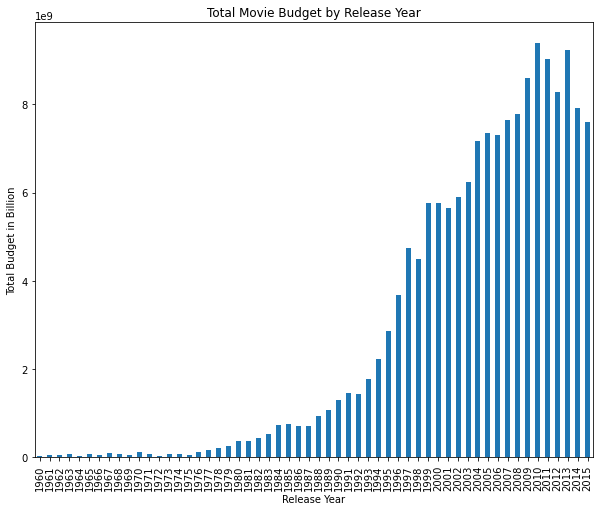

In [6]:
#Displaying the Total budget by release year in bar graph
plt.figure(figsize=(10, 8))  
movie_budget.plot(kind='bar')
plt.title('Total Movie Budget by Release Year')
plt.xlabel('Release Year',fontsize=10)
plt.ylabel('Total Budget in Billion')

## Q 2. Average Profit by year

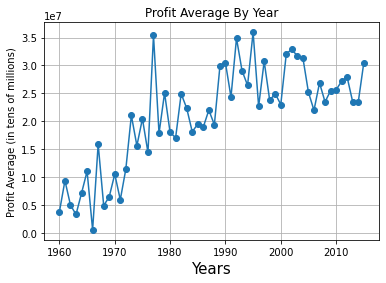

In [8]:
#Determining Average profit each year by substracting budget from revenue and averaging it
df_movies['yearly_profit']= df_movies['revenue']-df_movies['budget']
average_yearly_profit= df_movies.groupby('release_year')['yearly_profit'].mean()
average_yearly_profit.plot(marker='o', linestyle='-')
plt.title("Profit Average By Year")
plt.xlabel("Years", fontsize=15)
plt.ylabel("Profit Average (in tens of millions)")
plt.grid(True);


## Q.3 Highest number of movies by a production house


In [17]:
#Split the Production_companies names and storing the value in panda series
def count_data(x):
    separate = df_movies[x].str.cat(sep = '|')
    split = pd.Series(separate.split('|'))
    final = split.value_counts(ascending=False)
    return final
#Listing the companies with maximum movie produced
most_movies = count_data('production_companies')
most_movies.head()

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
dtype: int64

Text(0, 0.5, 'Number of Movies')

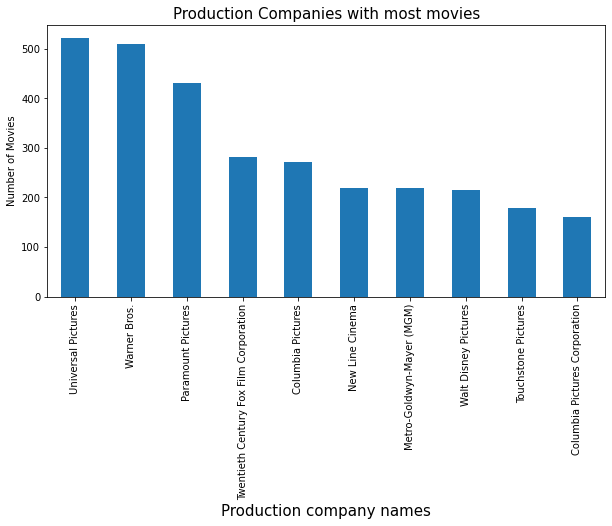

In [18]:
# Displaying the number of movie produced in bar chart
most_movies.head(10).plot.bar(figsize = (10,5))
plt.title("Production Companies with most movies",fontsize=15)
plt.xlabel("Production company names", fontsize=15)
plt.ylabel("Number of Movies")

## Q.4 Which actors have casted in most movies

In [19]:
#Split the Cast names and storing the value in panda series

def count_data(x):
    separate = df_movies[x].str.cat(sep = '|')
    split = pd.Series(separate.split('|'))
    final = split.value_counts(ascending=False)
    return final
#Listing the companies with maximum movie produced
most_movies = count_data('cast')
most_movies.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Susan Sarandon       48
dtype: int64

Text(0, 0.5, 'Number of Movies')

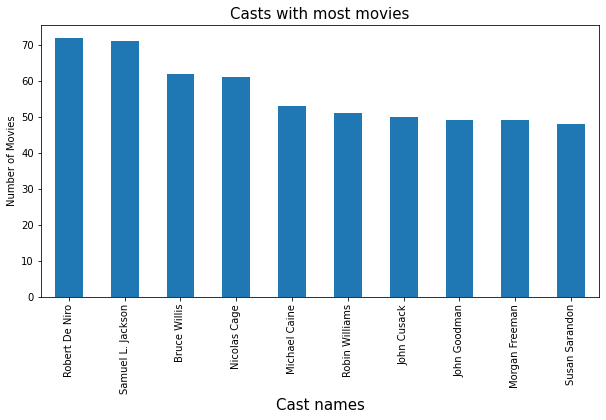

In [20]:
# Displaying the number of movies casted by actors in bar chart

most_movies.head(10).plot.bar(figsize = (10,5))
plt.title("Casts with most movies",fontsize=15)
plt.xlabel("Cast names", fontsize=15)
plt.ylabel("Number of Movies")



## Q.5 Relationship between Runtime and Revenue

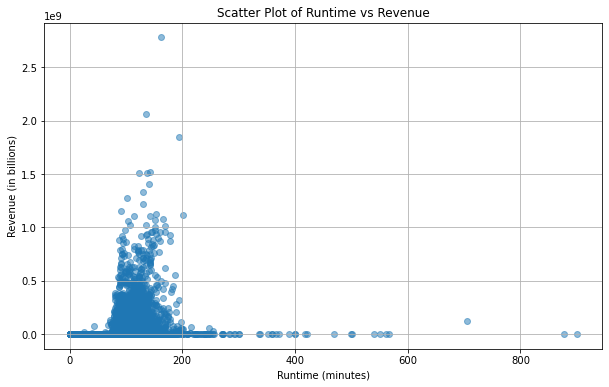

In [10]:
#Displaying Scatter diagram of relationship between Runtime and Revenue
plt.figure(figsize=(10, 6))
plt.scatter(df_movies['runtime'], df_movies['revenue'], alpha=0.5)
plt.title('Scatter Plot of Runtime vs Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue (in billions)')
plt.grid(True)
plt.show()

## Q6. Average runtime by year

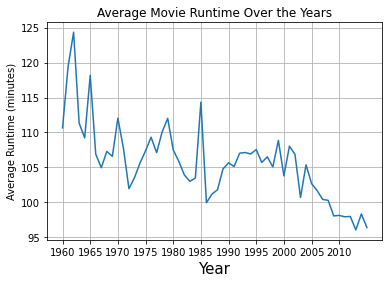

In [12]:
#Showing the recent years average movie runtime
average_runtimes=df_movies.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2015,5))
plt.title('Average Movie Runtime Over the Years')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Runtime (minutes)')
plt.grid(True)


## Conclusion and findings

1. The total budget of the movies are increasing significanly almost every year. Which does make sense since amount of movies and the cost of movie making are increasing at the same time.

2. In our second analysis, we analyzed the average profit of movies by each year. While almost every decade has seen ups and downs in profit but collectively the profit has positive linear relationship.

3. The third analysis shows the which production comapanies have produced most movies. It turns out that Universal Studios have produced more than 500 movies, Warner Bros and Paramount Pictures are next two large production house according to the data.

4. The next analysis shows most numbers of movies casted by an actor. We used the same formula to sort out this data. Robert De Niro and Samuel L. Jackson tops the list with around 70 movies.

5. In our 5th analysis, we show the relationship between length and the revenue of a movie. With the, visualtion we got after the analysis we can say that shorter movies have more revenues tha very long ones.

6. The last analysis we have done is to have a look at how the movie runtime has behaved over the years. And we can say that very relatable with our last analysis. The revenue is greater in shorter movies. So, over the years the average runtime have gone down significantly as well.

## Limitation

The major limitation that we have in this research is that before doing the analysis we have removed and filtered a lot data, so the data might not represent actual population. Another limitation is, the value of money changes so much that some of the budget related data doesn't represent the actual information.